In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

In [3]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
#   except RuntimeError as e:
#     # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
#     print(e)

In [4]:
data_dir = '/Users/CAL/Desktop/Lab/H1L1'
data_dir = Path(data_dir)

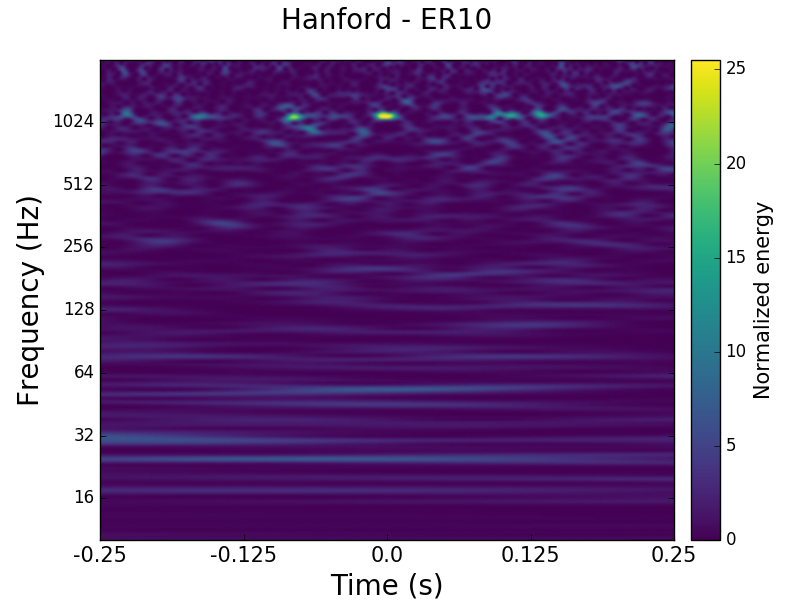

In [5]:
roses = list(data_dir.glob('1080Lines/*'))
PIL.Image.open(str(roses[0]))

In [6]:
from PIL import Image
 
image1 = Image.open(str(roses[0]))

imag1_size = image1.size

print(imag1_size)

(800, 600)


In [7]:
#making dataset
batch_size = 32
img_height = 600
img_width = 800

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 34332 files belonging to 22 classes.
Using 27466 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 34332 files belonging to 22 classes.
Using 6866 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['1080Lines', '1400Ripples', 'Air_Compressor', 'Blip', 'Chirp', 'Extremely_Loud', 'Helix', 'Koi_Fish', 'Light_Modulation', 'Low_Frequency_Burst', 'Low_Frequency_Lines', 'No_Glitch', 'None_of_the_Above', 'Paired_Doves', 'Power_Line', 'Repeating_Blips', 'Scattered_Light', 'Scratchy', 'Tomte', 'Violin_Mode', 'Wandering_Line', 'Whistle']


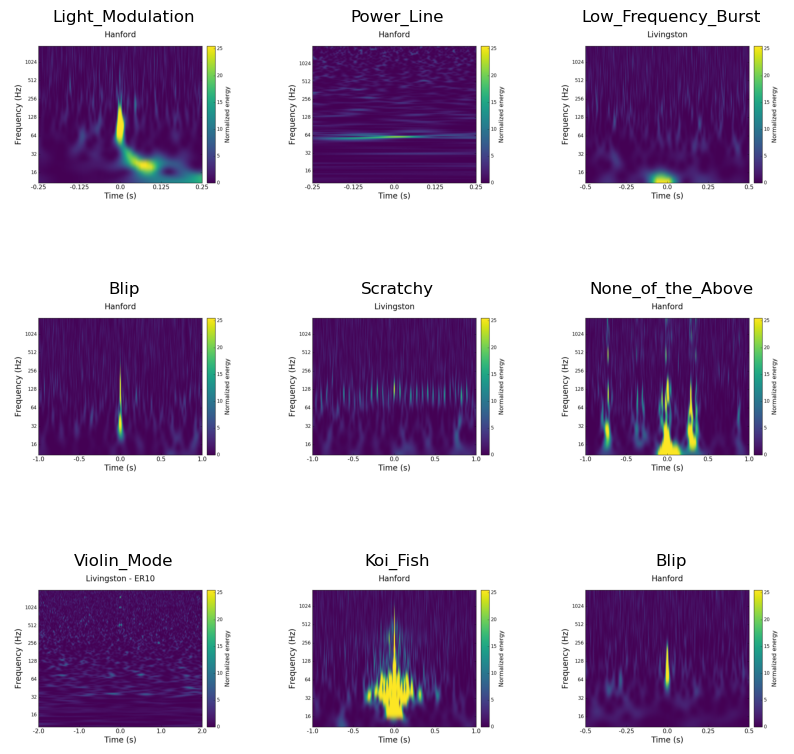

In [11]:
#data visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 600, 800, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
# normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [15]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixels values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image)) 

In [16]:
num_classes = 22

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 600, 800, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 600, 800, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 300, 400, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 400, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 200, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 200, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 100, 64)       0

In [19]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
859/859 [==============================] - 674s 581ms/step - loss: 0.7231 - accuracy: 0.8657 - val_loss: 0.1390 - val_accuracy: 0.9621
Epoch 2/20
859/859 [==============================] - 541s 625ms/step - loss: 0.0944 - accuracy: 0.9740 - val_loss: 0.1025 - val_accuracy: 0.9709
Epoch 3/20
859/859 [==============================] - 549s 639ms/step - loss: 0.0566 - accuracy: 0.9852 - val_loss: 0.0866 - val_accuracy: 0.9735
Epoch 4/20
859/859 [==============================] - 567s 660ms/step - loss: 0.0393 - accuracy: 0.9887 - val_loss: 0.1579 - val_accuracy: 0.9646
Epoch 5/20
859/859 [==============================] - 557s 648ms/step - loss: 0.0321 - accuracy: 0.9908 - val_loss: 0.1133 - val_accuracy: 0.9709
Epoch 6/20
859/859 [==============================] - 556s 647ms/step - loss: 0.0341 - accuracy: 0.9907 - val_loss: 0.1063 - val_accuracy: 0.9716
Epoch 7/20
859/859 [==============================] - 555s 646ms/step - loss: 0.0209 - accuracy: 0.9944 - val_loss: 0.1315 -

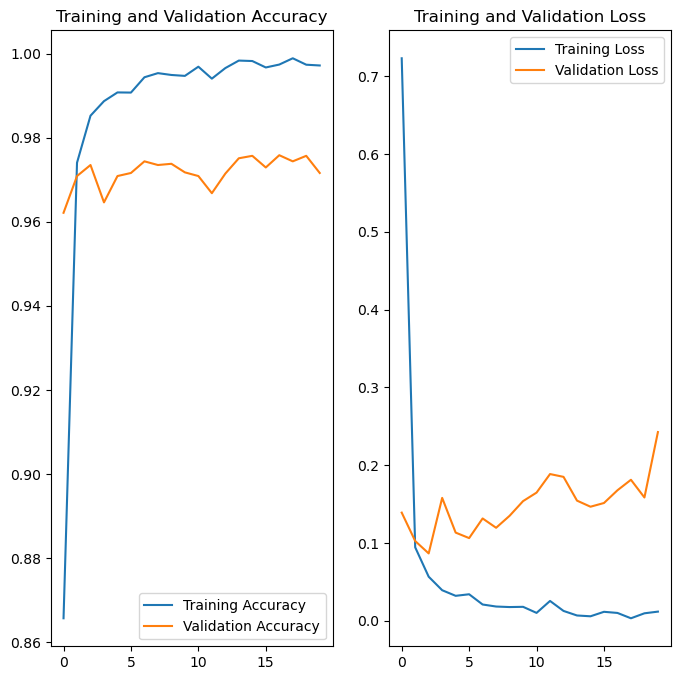

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('Data-fig')
plt.show()